# Capstone Project 24.1: Final Report

**Overview**: In this module, we will execute advanded feature engineering in the clean and prepared Data Set, additionaly we will execute correlation analisys between the engineered features and the target variable.

We will design and tune four different prediction models, next we will define the best evaluation scheme for our fitted models and use advanced tools to compensate inbalancing issues in the target variable.

**Author:** Arturo Noguera

**Executive Summary:** Out there every customer has plenty of options for every aquisition , we need to streght our customer´s satisfaction and loyalty. At the same time we need to reduce the probability that competitors can take over our clients. Using Data Driven go to Market strategy, we will create product bundles with more attractive prices and promote synergy among different product business units to reduce production and marketing costs.

**Rationale:** Our approach to this challengue is get to know each customer´s "buying profile"  and target specific customers with higher probability to buy bundles from a broader portfolio vs individual products.

**Research Question:** Predict which customers have more probability to buy items from any category belonging to Product_Line_1 , given that previously they bought items from any category belonging to Product_Line_2.

**Data Sources:** 

Sales orders received by a large IT corporation from customers located in multiple regions adquiring products from Product_Line_1 and Product_Line_2.

Each product line includes Hardware and Software, has several sublines and each subline includes multiple SKUs. 

Customer is profield based in their Market Segment, Vertical Market, and Geographical region

This Dataset includes the net price for each individual transaction, during a full calendar year.

**Methodology**:

-Use cleaning and  feature engineering techniques along with multiple visualizations tools to define which parts of the received information is relevant to use it in the modeling stage.

-Use feature engineering to create our final set of features that will be used for modeling

-Apply correlation analysis to define the relationships of engineered features vs our target vairable

-Implement four different models and tune these models accordingly to improve their accuracy to achieve the defined business goal

-Evaluate the tuned models and define with model is the best to implement based in their required resources and performance

-Use advanced oversampling techniques to improve the implemented models

-Define if the final models are able to solve the business goal and if its feasible deploy it.

### Import inital libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib 
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.metrics import balanced_accuracy_score


## Initial Data Modeling

In [2]:
#Read clean and preppared Data Set from EDA capstone phase.

In [3]:
df_final = pd.read_csv('./Data/Bookings_for_Modeling.csv')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15630 entries, 0 to 15629
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       15630 non-null  int64  
 1   Market_Segment   15630 non-null  object 
 2   Vertical_Market  15630 non-null  object 
 3   Region           15630 non-null  object 
 4   Net_Price        15630 non-null  float64
 5   buys_both        15630 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 732.8+ KB


In [4]:
### Get a ramdom Sample for our final Data Set to look for feasible computation times

-Once we have cleaned the initial DataSet we will preprocess it and sample it to use only 5000 random records for the modeling phase
-We will create 4 simple base models (default parameters) using Logistic Regression, KNN, Desition Threes and SVM clasfiers.

In [5]:
df_sample = df_final.sample(n=5000,random_state=142)
#df_sample = df_final

In [6]:
### Feature Engineering using column transformer with OneHot econder and and standarization scaler

In [7]:
num_features = ['Net_Price']
ohe_features = ['Market_Segment','Vertical_Market','Region']

FeatureEngineering = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ohe_features),
    (StandardScaler(), num_features),
    remainder="passthrough",
    verbose_feature_names_out=False,
)
FeatureEngineering

#Dataframe with engineered festures
df_trans = pd.DataFrame(FeatureEngineering.fit_transform(df_sample),columns=FeatureEngineering.get_feature_names_out())
df_trans.info()
df_trans.head()


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 ['Market_Segment', 'Vertical_Market',
                                  'Region']),
                                ('standardscaler', StandardScaler(),
                                 ['Net_Price'])],
                  verbose_feature_names_out=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Market_Segment_COMMERCIAL                   5000 non-null   float64
 1   Market_Segment_ENTERPRISE                   5000 non-null   float64
 2   Market_Segment_OTHER                        5000 non-null   float64
 3   Market_Segment_PUBLIC SECTOR                5000 non-null   float64
 4   Market_Segment_SERVICE PROVIDER             5000 non-null   float64
 5   Market_Segment_SMB                          5000 non-null   float64
 6   Vertical_Market_Education-Public_Private    5000 non-null   float64
 7   Vertical_Market_Energy_Utilities            5000 non-null   float64
 8   Vertical_Market_Financial_Services          5000 non-null   float64
 9   Vertical_Market_Government                  5000 non-null   float64
 10  Vertical_Mar

,Market_Segment_COMMERCIAL,Market_Segment_ENTERPRISE,Market_Segment_OTHER,Market_Segment_PUBLIC SECTOR,Market_Segment_SERVICE PROVIDER,Market_Segment_SMB,Vertical_Market_Education-Public_Private,Vertical_Market_Energy_Utilities,Vertical_Market_Financial_Services,Vertical_Market_Government,...,Vertical_Market_Service_Provider,Vertical_Market_Technical_Services,Vertical_Market_Transportation,Vertical_Market_WholeSale-Distribution,Region_GEO_1,Region_GEO_2,Region_GEO_3,Net_Price,Unnamed: 0,buys_both
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.770,3336.000,1.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,1.000,0.000,-1.162,13621.000,0.000
2,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.178,9000.000,0.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.524,876.000,0.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,-0.227,9315.000,1.000


In [8]:
### Feature Correlation to target variable

In [9]:
df_transformed_corr=df_trans.corr()['buys_both'].sort_values(ascending=False)
Corr_DF=pd.DataFrame(df_transformed_corr)
Corr_DF.rename(columns={"buys_both": "Correlation to Buys_Both Products"})

,Correlation to Buys_Both Products
buys_both,1.000
Region_GEO_2,0.143
Market_Segment_SMB,0.108
Vertical_Market_Retail,0.087
Vertical_Market_Health_Care,0.052
Vertical_Market_Transportation,0.051
Vertical_Market_Professional_Services,0.050
Vertical_Market_WholeSale-Distribution,0.039
Vertical_Market_Hospitality-Hotels_Leisure,0.013
Vertical_Market_Media-Entertainment,0.012


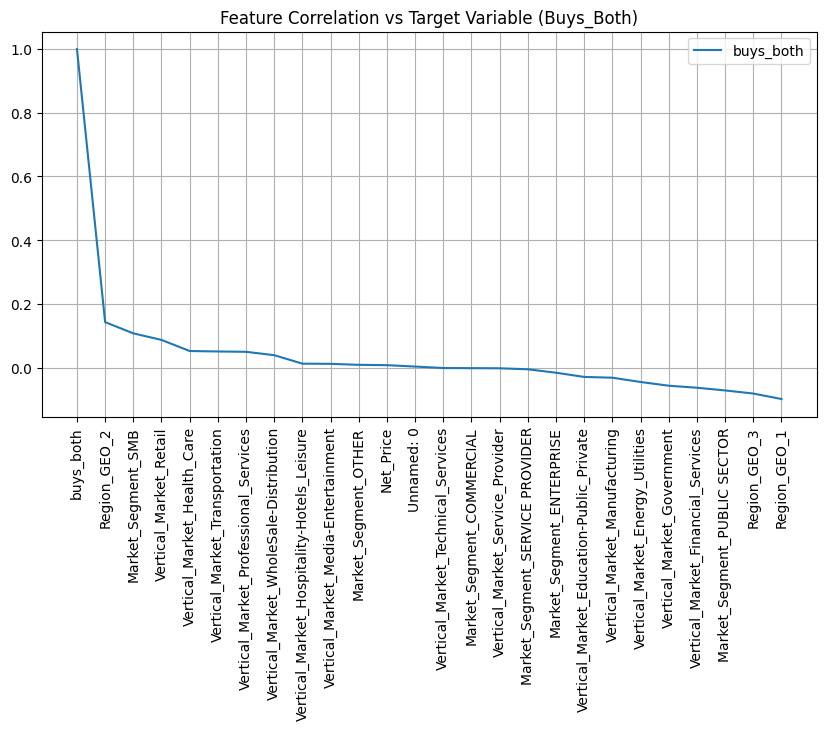

In [10]:
Corr_DF.plot(grid=True,figsize=[10,5])
plt.title('Feature Correlation vs Target Variable (Buys_Both)')
plt.xticks(ticks=range(len(Corr_DF.index)),labels=Corr_DF.index,rotation=90);

[Text(0.5, 1.0, 'Heatmap after Feature Engineering')]

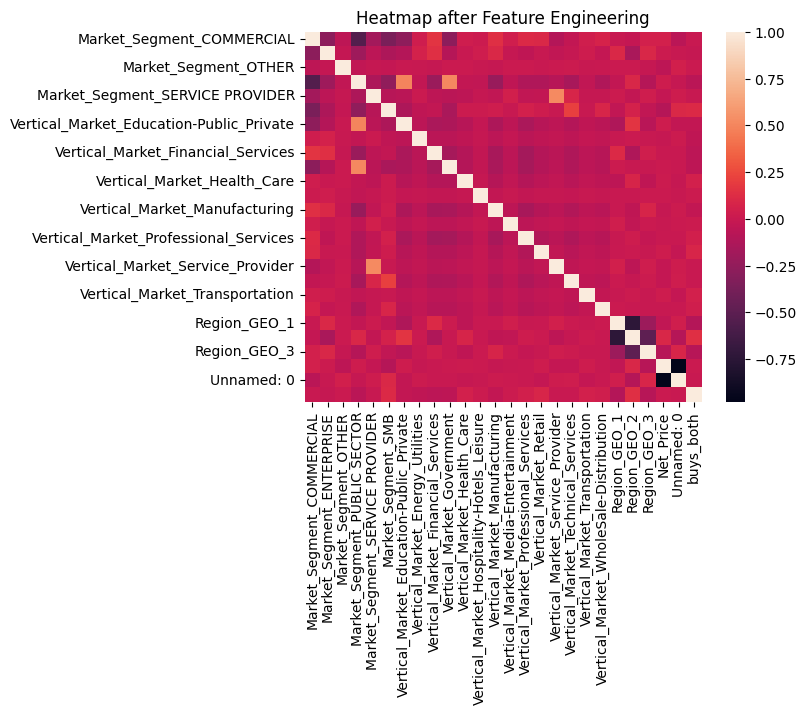

In [11]:
sns.heatmap(df_trans.corr()).set(title='Heatmap after Feature Engineering')

In [12]:
### Feature split between train and test sets using stratification to keep original distribution.

In [13]:
X = df_trans.drop(columns=['buys_both'])
#X = df_trans.drop(columns=['buys_both','Net_Price'])
y = df_trans['buys_both']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=142, stratify=y)

In [14]:
### Four base models with default paramters 

**Logistic Regression base model**

In [15]:
logRegMod = LogisticRegression()

logRegMod.fit(X_train,y_train)
logRegAcc_test = logRegMod.score(X_test,y_test)
logRegAcc_test

LogisticRegression()

0.6528

In [16]:
logRegf1_test = f1_score(logRegMod.predict(X_test),y_test)
logRegf1_test

0.28618421052631576

**K Nearest Neighbors base model**

In [17]:
knnClsMod = KNeighborsClassifier()

In [18]:
%%time
knnClsMod.fit(X_train,y_train)

CPU times: user 6.01 ms, sys: 17.2 ms, total: 23.2 ms
Wall time: 3.11 ms


KNeighborsClassifier()

In [19]:
knnClsAcc_test = knnClsMod.score(X_test,y_test)
knnClsAcc_test

0.5896

In [20]:
knnClsf1_test = f1_score(knnClsMod.predict(X_test),y_test)
knnClsf1_test

0.32941176470588235

**Decision Tree base model**

In [21]:
decTreMod = DecisionTreeClassifier()

In [22]:
%%time
decTreMod.fit(X_train,y_train)

CPU times: user 64.9 ms, sys: 51.1 ms, total: 116 ms
Wall time: 16.7 ms


DecisionTreeClassifier()

In [23]:
decTreAcc_test = decTreMod.score(X_test,y_test)
decTreAcc_test

0.6064

In [24]:
decTref1_test = f1_score(decTreMod.predict(X_test),y_test)
decTref1_test

0.462882096069869

In [25]:
#fig = plot_tree(decTreMod, filled=True, proportion=True, rounded=True)

**Support Vector Machine base model**

In [26]:
svmClsMod = SVC(probability=True)

In [27]:
%%time
svmClsMod.fit(X_train,y_train)

CPU times: user 1.85 s, sys: 633 ms, total: 2.48 s
Wall time: 1.41 s


SVC(probability=True)

In [28]:
svmClsAcc_test = svmClsMod.score(X_test,y_test)
svmClsAcc_test

0.6376

In [29]:
svmClsf1_test = f1_score(svmClsMod.predict(X_test),y_test)
svmClsf1_test

0.0

**Base Model accuracy benchmarking**

In [30]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'Test Accuracy':[logRegAcc_test,knnClsAcc_test,decTreAcc_test,svmClsAcc_test],
    'Test F1':[logRegf1_test,knnClsf1_test,decTref1_test,svmClsf1_test]})\
    .set_index('Model').sort_values(by=['Test F1'],ascending=False)
df_Models

,Test Accuracy,Test F1
Model,,
DecisionTree,0.606,0.463
K-NearestNeighbors,0.590,0.329
LogisticRegression,0.653,0.286
SupportVectorMachine,0.638,0.000


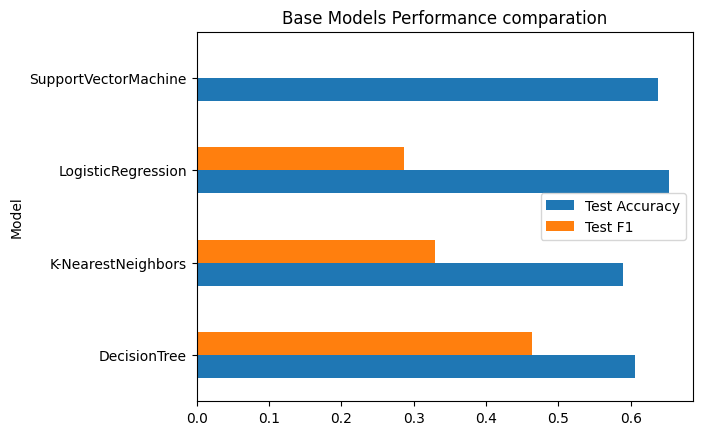

In [31]:
df_Models.plot(kind='barh',title='Base Models Performance comparation');

In [32]:
### Ensemble Voter Classifier using soft vote (probability based)

In [33]:
soft_voter = VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier()),    ('DTree',DecisionTreeClassifier())], voting = 'soft')
soft_voter.fit(X_train, y_train)
soft_voter_predict=soft_voter.predict(X_test)
soft_accuracy = soft_voter.score(X_test, y_test)
#print ("Ensemble Voter Classifier accuracy using soft vote: ", soft_accuracy)
Voter_F1=   f1_score(y_test,soft_voter_predict,pos_label=1)
Voter_Acc = accuracy_score(y_test,soft_voter_predict)
Voter_Pre = precision_score(y_test,soft_voter_predict,pos_label=1)
Voter_Rec = recall_score(y_test,soft_voter_predict,pos_label=1)


VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('lgr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('DTree', DecisionTreeClassifier())],
                 voting='soft')

In [34]:
df_Models = pd.DataFrame({
    'Model':['SOFT Voter_Base Models'],
    'F1':[Voter_F1],
    'Accuracy':[Voter_Acc],
    'Precision':[Voter_Pre],
    'Recall':[Voter_Rec]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

,F1,Accuracy,Precision,Recall
Model,,,,
SOFT Voter_Base Models,0.419,0.626,0.479,0.373


## Base Models Performance Improvement with Grid Search
There has been a significant reduction in features and the fitting times are quite fast already so the current engineered data set will be used for the next phase of hyperparameter tunning
Ultimately the business objective is to determine the best model to use for classification of this particular data hence the priority is to evaluate every model's performance with the same data set
More importantly, accuracy may not be the best metric to use in this case and since there are no serious implications for the customer or the company with false positives or false negatives; given the imbalanced classes for the target variable, it would be best to use F1 scoring

In [35]:
f1_scorer = make_scorer(f1_score, greater_is_better=True,  pos_label=1)

**Logistic Regression GridSearch best hyperparameters**

In [36]:
logRegParams = {'penalty':['l1','l2'],
                'fit_intercept':[False,True],
                'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']}

In [37]:
logRegGrd =  GridSearchCV(estimator=logRegMod,
                          param_grid=logRegParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [38]:
%%time
logRegGrd.fit(X_train,y_train)

CPU times: user 14.6 s, sys: 16.6 s, total: 31.2 s
Wall time: 3.25 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [False, True],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [39]:
logRegGrd.best_params_

{'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}

In [40]:
logRegProbs = logRegGrd.best_estimator_.predict_proba(X_test)[:,1]

In [41]:
logRegPreds = logRegGrd.best_estimator_.predict(X_test)

In [42]:
logRegAcc = accuracy_score(y_test,logRegPreds)
logRegAcc

0.6544

In [43]:
logRegF1 = f1_score(y_test,logRegPreds,pos_label=1)
logRegF1

0.3032258064516129

In [44]:
logRegPre = precision_score(y_test,logRegPreds, pos_label=1)
logRegPre

0.562874251497006

In [45]:
logRegRec = recall_score(y_test, logRegPreds, pos_label=1)
logRegRec

0.20750551876379691

In [46]:
logRegAuc = roc_auc_score(y_test, logRegProbs)
logRegAuc

0.6347256959735874

In [47]:
pd.Series(logRegPreds).value_counts()
y_test.value_counts()

0.000    1083
1.000     167
Name: count, dtype: int64

buys_both
0.000    797
1.000    453
Name: count, dtype: int64

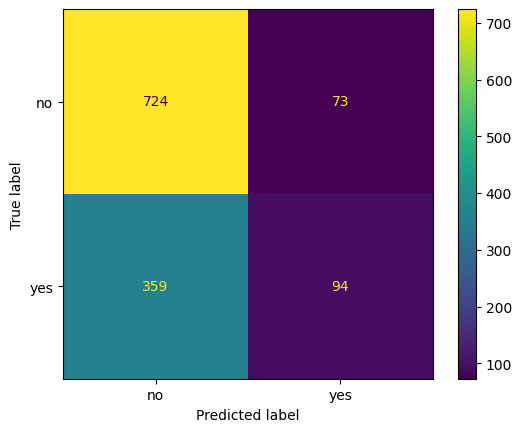

In [48]:
logRegCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,logRegPreds),display_labels=['no','yes'])
logRegCnfMtx.plot()

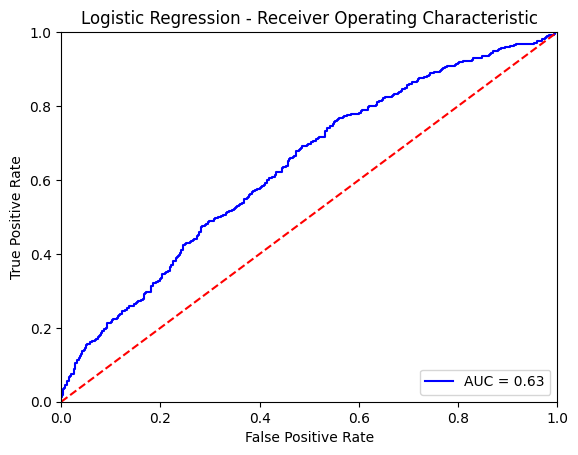

In [49]:
fpr, tpr, threshold = roc_curve(y_test,logRegProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Logistic Regression - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**K Nearest Neighbors best hyperparameters**

In [50]:
knnClsParams = {'n_neighbors':[3,5,10,15]}

In [51]:
knnClsGrd =  GridSearchCV(estimator=knnClsMod,
                          param_grid=knnClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True,
                          n_jobs=-1)

In [52]:
%%time
knnClsGrd.fit(X_train,y_train)

CPU times: user 53.5 ms, sys: 113 ms, total: 166 ms
Wall time: 1.76 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 10, 15]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [53]:
knnClsGrd.best_params_

{'n_neighbors': 3}

In [54]:
knnClsProbs = knnClsGrd.best_estimator_.predict_proba(X_test)[:,1]

In [55]:
knnClsPreds = knnClsGrd.best_estimator_.predict(X_test)

In [56]:
knnClsF1 = f1_score(y_test,knnClsPreds,pos_label=1)
knnClsF1

0.39443155452436196

In [57]:
knnClsAcc = accuracy_score(y_test,knnClsPreds)
knnClsAcc

0.5824

In [58]:
knnClsPre = precision_score(y_test,knnClsPreds,pos_label=1)
knnClsPre

0.4156479217603912

In [59]:
knnClsRec = recall_score(y_test,knnClsPreds,pos_label=1)
knnClsRec

0.37527593818984545

In [60]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
knnClsAuc

0.5651823477112018

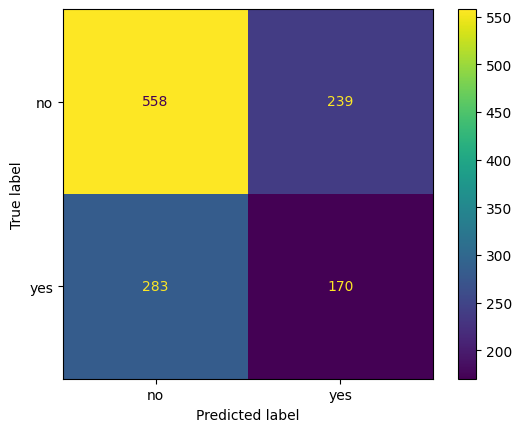

In [61]:
knnClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,knnClsPreds),display_labels=['no','yes'])
knnClsCnfMtx.plot()

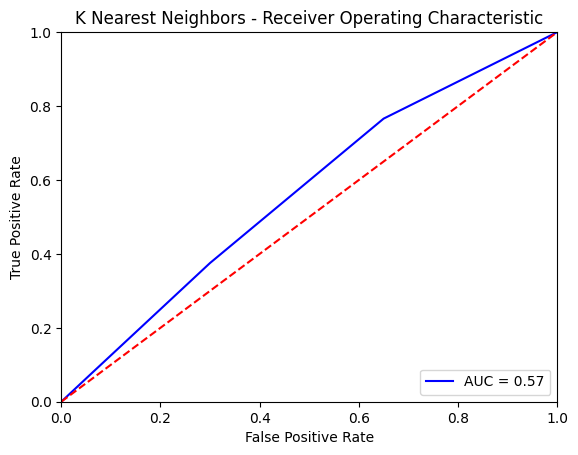

In [62]:
fpr, tpr, threshold = roc_curve(y_test,knnClsProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('K Nearest Neighbors - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Decision Tree best hyperparameters**

In [63]:
decTreParams = {'max_depth':[2,3,5,7,10,15],
                'criterion':['gini','entropy','log_loss'],
                'min_samples_split':[2,4,6,8],
                'min_samples_leaf':[1,2,3,5]}

In [64]:
decTreGrd =  GridSearchCV(estimator=decTreMod,
                          param_grid=decTreParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True,
                          n_jobs=-1)

In [65]:
%%time
decTreGrd.fit(X_train,y_train)

CPU times: user 765 ms, sys: 100 ms, total: 866 ms
Wall time: 1.9 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', pos_label=1))

In [66]:
decTreGrd.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [67]:
decTreProbs = decTreGrd.best_estimator_.predict_proba(X_test)[:,1]

In [68]:
decTrePreds = decTreGrd.best_estimator_.predict(X_test)

In [69]:
decTreF1 = f1_score(y_test,decTrePreds,pos_label=1)
decTreF1

0.3963254593175853

In [70]:
decTreAcc = accuracy_score(y_test,decTrePreds)
decTreAcc

0.632

In [71]:
decTrePre = precision_score(y_test,decTrePreds,pos_label=1)
decTrePre

0.4886731391585761

In [72]:
decTreRec = recall_score(y_test,decTrePreds,pos_label=1)
decTreRec

0.3333333333333333

In [73]:
decTreAuc = roc_auc_score(y_test,decTreProbs)
decTreAuc

0.6325361939502716

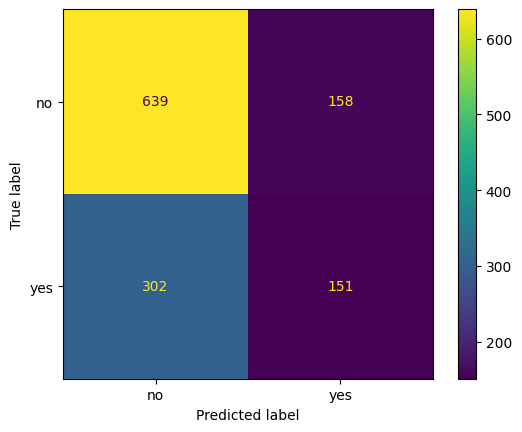

In [74]:
decTreCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,decTrePreds),display_labels=['no','yes'])
decTreCnfMtx.plot()

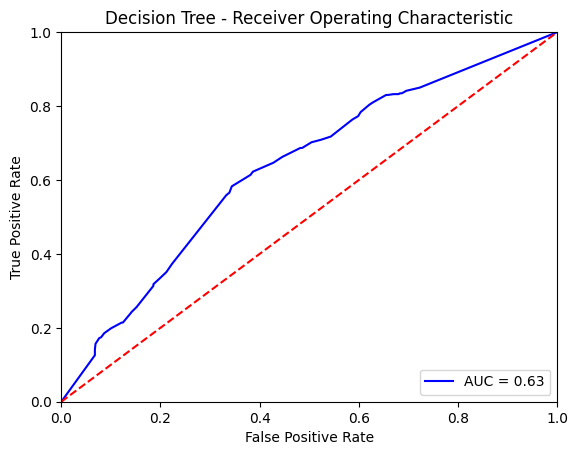

In [75]:
fpr, tpr, threshold = roc_curve(y_test,decTreProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Decision Tree - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

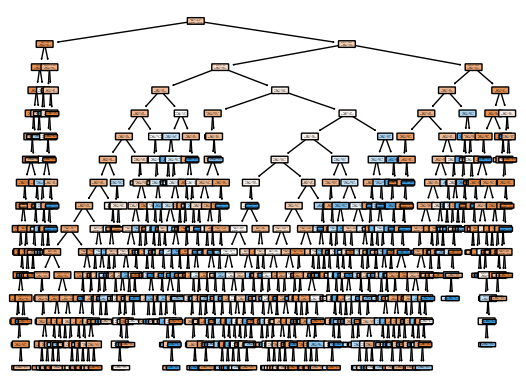

In [76]:
fig = plot_tree(decTreGrd.best_estimator_, filled=True, proportion=True, rounded=True)

In [77]:
### Support Vector Machine best hyperparameter

In [78]:
svmClsParams = {'C':[0.1,1.0,10],
                'kernel':['rbf','linear','poly'],
                'degree':[2,3],
                'gamma':['scale','auto']}

In [79]:
svmClsGrd =  GridSearchCV(estimator=svmClsMod,
                          param_grid=svmClsParams,
                          scoring=f1_scorer,
                          cv=5,
                          return_train_score=True)

In [ ]:
%%time
svmClsGrd.fit(X_train,y_train)

In [ ]:
svmClsGrd.best_params_

In [ ]:
svmClsProbs = svmClsMod.predict_proba(X_test)[:,1]

In [ ]:
svmClsPreds = svmClsGrd.best_estimator_.predict(X_test)

In [ ]:
svmClsF1 = f1_score(y_test,svmClsPreds,pos_label=1)
svmClsF1

In [ ]:
svmClsAcc = accuracy_score(y_test,svmClsPreds)
svmClsAcc

In [ ]:
svmClsPre = precision_score(y_test,svmClsPreds,pos_label=1)
svmClsPre

In [ ]:
svmClsRec = recall_score(y_test,svmClsPreds,pos_label=1)
svmClsRec

In [ ]:
svmClsAuc = roc_auc_score(y_test,svmClsProbs)
svmClsAuc

In [ ]:
svmClsCnfMtx = ConfusionMatrixDisplay(confusion_matrix(y_test,svmClsPreds),display_labels=['no','yes'])
svmClsCnfMtx.plot()

In [ ]:
fpr, tpr, threshold = roc_curve(y_test,svmClsProbs,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Support Vector Machine - Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Best Models Performance Comparison**

In [ ]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1,knnClsF1,decTreF1,svmClsF1],
    'Accuracy':[logRegAcc,knnClsAcc,decTreAcc,svmClsAcc],
    'Precision':[logRegPre,knnClsPre,decTrePre,svmClsPre],
    'Recall':[logRegRec,knnClsRec,decTreRec,svmClsRec],
    'AUC':[logRegAuc,knnClsAuc,decTreAuc,svmClsAuc]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

In [ ]:
df_Models.plot(kind='barh',title='Best Models Performance comparation after Grid Search');

In [ ]:
### Model Essemble using Voting Classifier with soft vote and Grid Search 

In [ ]:
#Use the key for the classifier followed by __ and the attribute

'''
#Parameters used for individual models fitting with Grid Searh
params = {'svm__C': [0.1, 1.0, 10], 'svm__degree': [2, 3], 'svm__gamma': ['scale', 'auto'], 'svm__kernel': ['rbf', 'linear', 'poly'],
          'lgr__fit_intercept': [False],'lgr__penalty': ['l1','l2'], 'lgr__solver': ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
          'knn__n_neighbors': [3, 5, 10, 15],
          'decTre__criterion': ['gini', 'entropy', 'log_loss'], 'decTre__max_depth': [2, 3, 5, 7, 10, 15], 'decTre__min_samples_leaf': [1, 2, 3, 5], 'decTre__min_samples_split': [2, 4, 6, 8]
          }
#Feasible parameters for Grid Search with acceptable computing times for a soft Voter Ensemble
params ={'svm__C': [0.1, 1.0, 10], 'svm__degree': [2, 3], 'svm__gamma': ['scale', 'auto'], 'svm__kernel': ['rbf', 'linear', 'poly'],
         'lgr__fit_intercept': [True], 'lgr__penalty': ['l2'], 'lgr__solver': ['liblinear'],
         'knn__n_neighbors': [3, 5, 10],
         'decTre__criterion': ['gini'], 'decTre__max_depth': [15], 'decTre__min_samples_leaf': [1, 2], 'decTre__min_samples_split': [2, 8]
        }

'''        
#for evaluation purposses Use Best Parameters found after fitting indidual models with Grid Search
params ={'svm__C': [10], 'svm__degree': [2], 'svm__gamma': ['auto'], 'svm__kernel': ['rbf'],
         'lgr__fit_intercept': [True], 'lgr__penalty': ['l2'], 'lgr__solver': ['liblinear'],
         'knn__n_neighbors': [3],
         'decTre__criterion': ['gini'],'decTre__max_depth': [15],'decTre__min_samples_leaf': [1],'decTre__min_samples_split': [8]}     
     
#SVC(probability = True)), will slow down that method as it internally uses 5-fold cross-validation.

eclf = VotingClassifier(estimators=[ 
    ('svm', SVC(probability = True)),
    ('lgr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('decTre',DecisionTreeClassifier())
    ], voting='soft')

Voter_grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)

Voter_grid.fit(X_train,y_train)

#Best Estimador for  model Ensemble
print(Voter_grid.best_estimator_)
print (Voter_grid.best_params_)

#Best Estimador predictions and probabilities
Voter_Preds = Voter_grid.best_estimator_.predict(X_test)
Voter_Probs = Voter_grid.predict_proba(X_test)[:,1]

#Best estimator scores
Voter_grid_F1=   f1_score(y_test,Voter_Preds,pos_label=1)
Voter_grid_Acc = accuracy_score(y_test,Voter_Preds)
Voter_grid_Pre = precision_score(y_test,Voter_Preds,pos_label=1)
Voter_grid_Rec = recall_score(y_test,Voter_Preds,pos_label=1)
Voter_grid_roc = roc_auc_score(y_test,Voter_Probs)




In [ ]:
df_Models = pd.DataFrame({
    'Model':['SOFT Voter_Grid_Search'],
    'F1':[Voter_grid_F1],
    'Accuracy':[Voter_grid_Acc],
    'Precision':[Voter_grid_Pre],
    'Recall':[Voter_grid_Rec],
    'AUC':[Voter_grid_roc]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

### Synthetic Minority Oversampling Technique (SMOTE)

Due to the imbalanced nature of the target Variable in the  initial Data Set, we will test another technique call SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a popular method to over-sample minority class.SMOTE should be applied only to the training data, after it has been separated from the testing data. This prevents data leakage and provides a more reliable evaluation of your model's performance on unseen data

In [ ]:
from imblearn.over_sampling import SMOTE

y_train.value_counts()
y_train.value_counts(normalize=True)

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
y_resampled.value_counts()

#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , random_state=142, stratify=y_resampled)


**Logistic Regresion  GridSearch with Oversampled Train Set**

In [ ]:
logRegMod_smote =logRegGrd.fit(X_resampled,y_resampled)
logRegPreds_smote = logRegMod_smote.best_estimator_.predict(X_test)

In [ ]:
logRegF1_smote = logRegMod_smote.best_score_
logRegF1_smote

In [ ]:
logRegAcc_smote = accuracy_score(y_test,logRegPreds_smote)
logRegAcc

**The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.**

In [ ]:
balanced_accuracy_score(y_test,logRegPreds_smote)

**KNN Gridsearch with Oversampled Train Set**

In [ ]:
KnnClsMod_smote = knnClsGrd.fit(X_resampled,y_resampled)
knnClsPreds_smote = KnnClsMod_smote.best_estimator_.predict(X_test)

In [ ]:
knnClsF1_smote = KnnClsMod_smote.best_score_
knnClsF1_smote

In [ ]:
knnClsAcc_smote = accuracy_score(y_test,knnClsPreds_smote)
knnClsAcc_smote

In [ ]:
knnClsAuc = roc_auc_score(y_test,knnClsProbs)
knnClsAuc

**Desition Trees Gridsearch with Oversampled Train Set**

In [ ]:
decTreMod_smote = decTreGrd.fit(X_resampled,y_resampled)
decTrePreds_smote = decTreMod_smote.best_estimator_.predict(X_test)

In [ ]:
decTreF1_smote =decTreMod_smote.best_score_
decTreF1_smote

In [ ]:
decTreAcc_smote = accuracy_score(y_test,decTrePreds_smote)
decTreAcc_smote

**SVM Gridsearch with Oversampled Train Set**

In [ ]:
svmClsMod_smote =svmClsGrd.fit(X_resampled,y_resampled)
svmClsPreds_smote = svmClsMod_smote.best_estimator_.predict(X_test)

In [ ]:
svmClsF1_smote = svmClsMod_smote.best_score_
svmClsF1_smote

In [ ]:
svmClsAcc_smote = accuracy_score(y_test,svmClsPreds_smote)
svmClsAcc_smote

**Best Models Performance with oversampling Comparison**

In [ ]:
df_Models = pd.DataFrame({
    'Model':['LogisticRegression','K-NearestNeighbors','DecisionTree','SupportVectorMachine'],
    'F1':[logRegF1_smote,knnClsF1_smote,decTreF1_smote,svmClsF1_smote],
    'Accuracy':[logRegAcc_smote,knnClsAcc_smote,decTreAcc_smote,svmClsAcc_smote]})\
    .set_index('Model').sort_values(by=['F1','Accuracy'],ascending=False)
df_Models

In [ ]:
df_Models.plot(kind='barh',title='Best Models Performance comparation after Grid Search and SMOTE resampling');

## Findings:

1) We received a Data Set of 76424 Observations, we found an imbalanced binary class in the Target variable.
    
2) Started the Data Modeling by sampling 5000 observations from the received DataSet

3) Executed Feature engineering by transforming columns using OneHot encoder and Standard Scaler where applicable.

4) Executed Correlation analysis over the engineered features vs the target variable. The correlation analysis after feature engineering, shows poor positive correlation of most variables vs our target variable, This is critical because it could mean that engineered features in the received Data Set are not representative enough and/or are not good enough indicators for the target variable.

5) Split the engineered Data Set to create Train and Test subsets.

6) Implemented base models using K-NearestNeighbors, SupportVectorMachine, DecisionTree, LogisticRegression
   found Accuracy around 0.65 for LogisticRegression, however we decided to focused in the F1-score metric 
   to look forward  an equal balance between precision and recall, which is extremely useful in most 
   scenarios when we are working with imbalanced datasets 

7) F1 score was low for all four base predictors models with default parameters, 
   being DecisionTree  and K-NearestNeighbors the best performer models with 0.465  0.4121 F1 score respectively.

8) An Ensemble Voter Classifier using soft vote for the four base models reported  0.436 F1 score.
   
9) After executing GridSearch with a large rage of parameters,F1 score  did not improve significatively for all four 
   predictor models, however this time K-NearestNeighbors and SupportVectorMachine were the best performers
    with 0.438 and 0.4180 F1 score respectively.

10) An Ensemble Voter Classifier using soft vote with an enbeded GridSearch for the four tuned models reported  0.378 F1 score

11) After executing oversampling on the minority class using SMOT over all four models with GridSearch, 
    the F1 performance increased significatively for all four models
    SupportVectorMachine reported 0.695  F1 score, 	while  DecisionTrees reported 0.690	F1 score, which are superior from the
    Accuracy figures reported in all previous cases.

12) Our candidate models to execute the deployment will be SupportVectorMachine and in second place DecisionTrees,
    altough both models require significative compute resources, the execution frequency of "Data Driven Go to Market Strategy"
    tool is not high, so this is not a concern for this specific scenario.

## Next Steps and recommendations

The correlation analysis after feature engineering, shows poor positive correlation of most variables vs our target variable. We may need to change the way the original data was extracted and add additional features that may lead to significant correlation to target variable.

Including dates in each Sales Order, could lead to an additional feature that models the procurement sequence from products of interest for each customer.

Resampling methods increased marginaly the accuracy, so in this escenario SMOT is not a final solution to the imbalance problem. It's important to understand that imbalanced data is a problem only if the minority class in the training set is not representative enough and/or the features are not good enough indicators for the label. The ideal scenario is to solve these two problems first, then the model will perform as expected.